# Navigation

---

This notebook uses a simplified version provided by Udacity of the Unity ML-Agents environment to train an agent to navigate (and collect bananas!) in a large, square world. 


![alt-text](banana.gif)


The simulation contains a single agent that has four actions at its disposal:
A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

The goal of the agent is to collect as many yellow bananas as possible while avoiding blue bananas. The environment is solved, if the agent receives a reward of `+13`.

In [13]:
import os
import numpy as np
import pandas as pd 
import torch
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from train import dqn
from agent import Agent

%matplotlib inline

### 1. Start the Environment

In [2]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment. At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  

Environments contain brains which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

Run the code cell below to print some information about the environment.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step. If running with graphics enabled, a window should pop up that allows you to observe the agent, as it moves through the environment.

After training the achieved score is printed, which is usually around zero.


In [4]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


## Training

In the next cell an agent is trained using a deep learning algorithm.
A detailed description of the implementation is given here (report)

The following steps are executed:

1. Reset the environment for training
- Create the agent
- Perfom training using the dqn algorithm form the train module 
- Assign scores and running mean to scores, running_mean variables
- Plot scores and running mean


In [5]:
from train import dqn
from agent import Agent

# create folder for storing results
if not os.path.exists('./results'):
    os.mkdir('results')  
    
# reset env for training
env_info = env.reset(train_mode=True)[brain_name]

agent = Agent(state_size=37, action_size=4)
scores, running_mean = dqn(env=env, agent=agent, checkpoint_path='results/checkpoint_initial.pth')


Episode 100	Average Score: 1.23
Episode 200	Average Score: 4.50
Episode 300	Average Score: 8.51
Episode 400	Average Score: 10.05
Episode 500	Average Score: 12.62
Episode 509	Average Score: 13.06
Environment solved in 409 episodes!	Average Score: 13.06


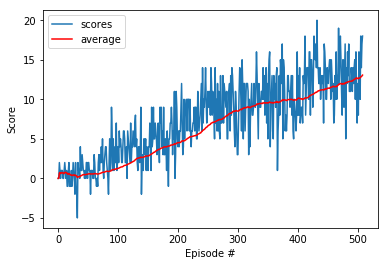

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='scores')
plt.plot(np.arange(len(running_mean)), running_mean, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

### Tuning the Learning Rate
To find optimal hyperparameters regarding the learning rate, the agent is trained with varying values for the 
learning decay. After training, results are plotted.
 

In [8]:
state_size = 37
action_size = 4

def do_training(checkpoint_path, result_path, eps_params):
    env_info = env.reset(train_mode=True)[brain_name]
    agent = Agent(state_size=state_size, action_size=action_size)
    scores, running_mean = dqn(env=env, agent=agent, checkpoint_path=checkpoint_path,
                              eps_start=eps_params[0], eps_end=eps_params[1], eps_decay=eps_params[2])
    df = pd.DataFrame(index=None)
    df['scores'] = scores
    df['running_mean'] = running_mean
    df.to_csv(result_path, index=None)

do_training('results/checkpoint_1.pth', 'results/scores_1.csv', (1., 0.01, 0.99))
do_training('results/checkpoint_2.pth', 'results/scores_2.csv', (1., 0.01, 0.95))
do_training('results/checkpoint_3.pth', 'results/scores_3.csv', (1., 0.01, 0.89))
do_training('results/checkpoint_4.pth', 'results/scores_4.csv', (1., 0.01, 0.55))
do_training('results/checkpoint_5.pth', 'results/scores_5.csv', (1., 0.01, 0.50))


Episode 100	Average Score: 2.46
Episode 200	Average Score: 7.95
Episode 300	Average Score: 10.91
Episode 395	Average Score: 13.00
Environment solved in 295 episodes!	Average Score: 13.00
Episode 100	Average Score: 4.69
Episode 200	Average Score: 8.62
Episode 300	Average Score: 10.50
Episode 367	Average Score: 13.09
Environment solved in 267 episodes!	Average Score: 13.09
Episode 100	Average Score: 2.56
Episode 200	Average Score: 8.30
Episode 300	Average Score: 11.23
Episode 354	Average Score: 13.04
Environment solved in 254 episodes!	Average Score: 13.04
Episode 100	Average Score: 3.00
Episode 200	Average Score: 8.93
Episode 300	Average Score: 12.35
Episode 312	Average Score: 13.00
Environment solved in 212 episodes!	Average Score: 13.00
Episode 100	Average Score: 3.26
Episode 200	Average Score: 10.50
Episode 259	Average Score: 13.02
Environment solved in 159 episodes!	Average Score: 13.02


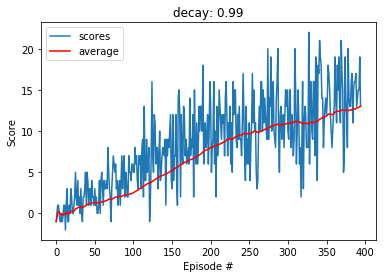

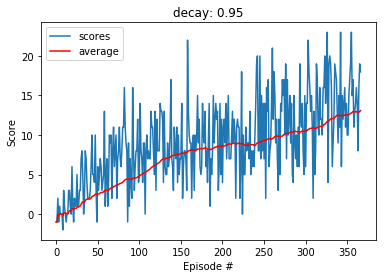

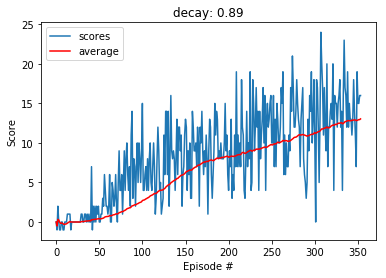

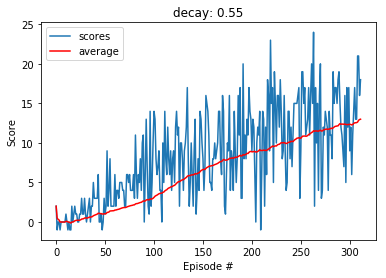

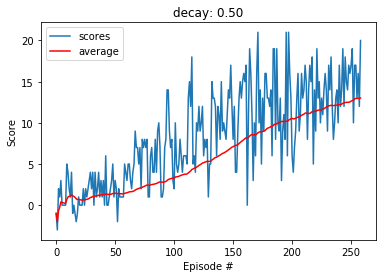

In [9]:
def plot_scores(scores_path, title):
    data = pd.read_csv(scores_path)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title(title)
    plt.plot(np.arange(data.shape[0]), data['scores'], label='scores')
    plt.plot(np.arange(data.shape[0]), data['running_mean'], c='r', label='average')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.legend(loc='upper left')
    
plot_scores('results/scores_1.csv', 'decay: 0.99')
plot_scores('results/scores_2.csv', 'decay: 0.95')
plot_scores('results/scores_3.csv', 'decay: 0.89')
plot_scores('results/scores_4.csv', 'decay: 0.55')
plot_scores('results/scores_5.csv', 'decay: 0.50')

In [14]:
## Test best performing Agent

# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('results/checkpoint_5.pth'))

scores = []
for i_episode in range(1, 21):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = agent.act(state, eps=0)               # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            scores.append(score)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            break


Episode 1	Average Score: 14.00
Episode 2	Average Score: 15.00
Episode 3	Average Score: 16.33
Episode 4	Average Score: 16.00
Episode 5	Average Score: 14.60
Episode 6	Average Score: 15.17
Episode 7	Average Score: 13.14
Episode 8	Average Score: 13.25
Episode 9	Average Score: 13.89
Episode 10	Average Score: 12.70
Episode 11	Average Score: 12.91
Episode 12	Average Score: 13.17
Episode 13	Average Score: 13.38
Episode 14	Average Score: 13.21
Episode 15	Average Score: 13.73
Episode 16	Average Score: 13.50
Episode 17	Average Score: 13.71
Episode 18	Average Score: 14.33
Episode 19	Average Score: 14.21
Episode 20	Average Score: 14.25


When finished, close the environment.

In [15]:
env.close()